##Kaggle

In [1]:
! pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 5.4MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=ec48717e61158506c3483adfbe45f317daba7421a390bb51becbc2090033b931
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bluecoder1206","key":"68dcf0f9521940e72f2268bd6739a6e9"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d trolukovich/food11-image-dataset

 99% 1.08G/1.08G [00:12<00:00, 83.3MB/s]
100% 1.08G/1.08G [00:12<00:00, 92.0MB/s]


In [6]:
! unzip food11-image-dataset.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/training/Soup/223.jpg  
  inflating: dataset/training/Soup/224.jpg  
  inflating: dataset/training/Soup/225.jpg  
  inflating: dataset/training/Soup/226.jpg  
  inflating: dataset/training/Soup/227.jpg  
  inflating: dataset/training/Soup/228.jpg  
  inflating: dataset/training/Soup/229.jpg  
  inflating: dataset/training/Soup/23.jpg  
  inflating: dataset/training/Soup/230.jpg  
  inflating: dataset/training/Soup/231.jpg  
  inflating: dataset/training/Soup/232.jpg  
  inflating: dataset/training/Soup/233.jpg  
  inflating: dataset/training/Soup/234.jpg  
  inflating: dataset/training/Soup/235.jpg  
  inflating: dataset/training/Soup/236.jpg  
  inflating: dataset/training/Soup/237.jpg  
  inflating: dataset/training/Soup/238.jpg  
  inflating: dataset/training/Soup/239.jpg  
  inflating: dataset/training/Soup/24.jpg  
  inflating: dataset/training/Soup/240.jpg  
  inflating: dataset/training/Soup/241.jpg  
  infl

# Transfer Learning

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [8]:
training_path = "/content/dataset/training"
test_path="/content/dataset/validation"

In [9]:
#Augmentation part
dataGen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, rotation_range=5, horizontal_flip=True, vertical_flip=True)

train_dataset= dataGen.flow_from_directory(training_path, target_size = (224,224), batch_size = 32)
test_dataset= dataGen.flow_from_directory(test_path, target_size = (224,224), batch_size = 32)

Found 9866 images belonging to 11 classes.
Found 3430 images belonging to 11 classes.


In [10]:
pretrained_model=tf.keras.applications.ResNet50(weights="imagenet")

102973440/102967424 [==============================] - 1s 0us/step


In [11]:
CNNmodel = tf.keras.models.Sequential()

CNNmodel.add(pretrained_model)
#CNNmodel.add(tf.keras.layers.GlobalAveragePooling2D())

# Neural Network - For classification
CNNmodel.add(tf.keras.layers.Flatten())
CNNmodel.add(tf.keras.layers.Dense(256, activation='relu'))
CNNmodel.add(tf.keras.layers.Dropout(0.5))
CNNmodel.add(tf.keras.layers.Dense(128, activation='relu'))
CNNmodel.add(tf.keras.layers.Dropout(0.3))
CNNmodel.add(tf.keras.layers.Dense(11,activation='softmax'))

In [35]:
CNNmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1000)              25636712  
_________________________________________________________________
flatten (Flatten)            (None, 1000)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               256256    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 11)                1

In [12]:
CNNmodel.compile(optimizer = 'adam',
                loss='categorical_crossentropy',metrics = ['accuracy'])

In [13]:
history = CNNmodel.fit(train_dataset,validation_data= test_dataset, epochs = 15)

Epoch 1/15
309/309 [==============================] - 261s 722ms/step - loss: 2.3203 - accuracy: 0.1576 - val_loss: 2.3028 - val_accuracy: 0.1458
Epoch 2/15
309/309 [==============================] - 221s 714ms/step - loss: 2.2045 - accuracy: 0.2160 - val_loss: 2.9693 - val_accuracy: 0.1458
Epoch 3/15
309/309 [==============================] - 221s 714ms/step - loss: 2.0584 - accuracy: 0.2763 - val_loss: 2.5282 - val_accuracy: 0.1913
Epoch 4/15
309/309 [==============================] - 220s 712ms/step - loss: 1.9955 - accuracy: 0.3027 - val_loss: 2.1623 - val_accuracy: 0.2481
Epoch 5/15
309/309 [==============================] - 221s 714ms/step - loss: 1.9653 - accuracy: 0.3050 - val_loss: 2.4285 - val_accuracy: 0.1423
Epoch 6/15
309/309 [==============================] - 221s 714ms/step - loss: 1.9834 - accuracy: 0.3001 - val_loss: 2.3335 - val_accuracy: 0.2446
Epoch 7/15
309/309 [==============================] - 221s 715ms/step - loss: 1.8347 - accuracy: 0.3646 - val_loss: 1.9204 -

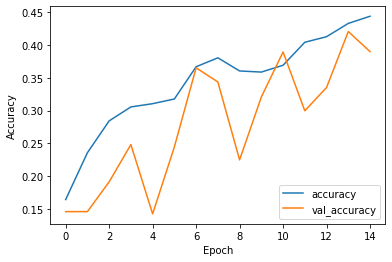

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

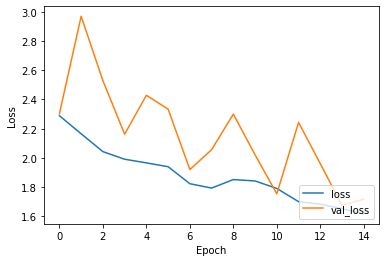

In [28]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [18]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

This image most likely belongs to Dessert with a 10.19 percent confidence.


Dessert  :  10.187359154224396
Soup  :  9.83823835849762
Meat  :  9.62556079030037




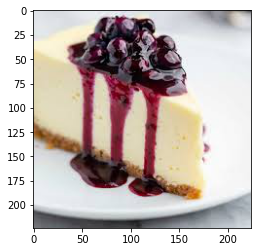

In [40]:
img = tf.keras.preprocessing.image.load_img("/content/c.jpeg",target_size=(224,224,3))
class_names =['Bread','Dairy','Dessert','Egg','Fried Food','Meat','Noodles-Pasta','Rice','Seafood','Soup','Vegetable/Fruit']
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = CNNmodel.predict(img_array)
score = tf.nn.softmax(predictions[0])


print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score)))

print()

#print(class_names)
result=np.sort(score)
#print(result)
result_name=np.argsort(score)

print()

print(class_names[result_name[-1]]," : ",result[-1]*100)
print(class_names[result_name[-2]]," : ",result[-2]*100)
print(class_names[result_name[-3]]," : ",result[-3]*100)

print()
print()

plt.imshow(img)
plt.show()